# the data analysis of the wind farms

In [1]:
# upload the data from .xslx files
import pandas as pd
Dataset_WF_site1 = pd.read_excel(r'data_original/wind_farms/Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'data_original/wind_farms/Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'data_original/wind_farms/Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site4 = pd.read_excel(r'data_original/wind_farms/Wind farm site 4 (Nominal capacity-66MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site5 = pd.read_excel(r'data_original/wind_farms/Wind farm site 5 (Nominal capacity-36MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site6 = pd.read_excel(r'data_original/wind_farms/Wind farm site 6 (Nominal capacity-96MW).xlsx'
                                ).drop(index=0)

In [2]:
Dataset_WF_site2.head()

,Time(year-month-day h:m:s),Wind speed at height of 10 meters (m/s),Wind direction at height of 10 meters (˚),Wind speed at height of 30 meters (m/s),Wind direction at height of 30 meters (˚),Wind speed at height of 50 meters (m/s),Wind direction at height of 50 meters (˚),Wind speed - at the height of wheel hub (m/s),Wind speed - at the height of wheel hub (˚),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
1,2019-01-01 00:15:00,2.951,129.697,2.951,118.488,2.951,97.463,2.186,108.914,-12.992,887.227,33.005,36.811337
2,2019-01-01 00:30:00,2.951,124.756,3.563,118.210,2.798,91.528,2.492,97.322,-12.745,887.094,33.000,31.172535
3,2019-01-01 00:45:00,2.186,129.019,2.339,112.761,2.339,94.015,1.281,99.393,-12.904,887.214,33.004,27.836002
4,2019-01-01 01:00:00,2.033,121.358,1.880,105.626,2.186,99.392,2.186,95.703,-12.979,887.227,33.005,31.192802
5,2019-01-01 01:15:00,2.339,131.853,3.563,122.411,2.951,108.440,2.033,107.327,-12.772,887.107,33.000,35.726536


In [3]:
for dataset in [Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H','Power(MW)']

In [4]:
Dataset_WF_site1.head()

,time,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
1,2019-01-01 00:15:00,1.828,77.460,1.698,75.048,1.757,88.733,1.882,74.367,-13.691,889.575,76.757,0.329703
2,2019-01-01 00:30:00,2.193,86.700,2.313,84.688,2.344,89.100,2.350,NaN,-13.766,889.942,76.981,0.296306
3,2019-01-01 00:45:00,2.654,78.160,2.494,74.939,2.574,87.267,2.808,82.733,-13.691,889.675,76.821,0.187590
4,2019-01-01 01:00:00,2.249,94.297,2.192,91.140,2.558,96.900,2.924,92.967,-13.447,890.025,74.571,0.081005
5,2019-01-01 01:15:00,1.974,92.933,1.980,91.921,2.049,97.000,2.137,100.133,-13.983,889.692,71.808,0.189721


In [5]:
# missing data and outliers processing
from collections import Counter
# Counter(Dataset_WF_site1['WS_10']).most_common()
Dataset_WF_site3['Air_T'].value_counts()

 26.460    11194
 0.000       429
 25.250       58
 14.810       58
 11.960       56
           ...  
-2.107         1
-2.186         1
-2.256         1
-2.336         1
-5.178         1
Name: Air_T, Length: 10938, dtype: int64

c:\users\q\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


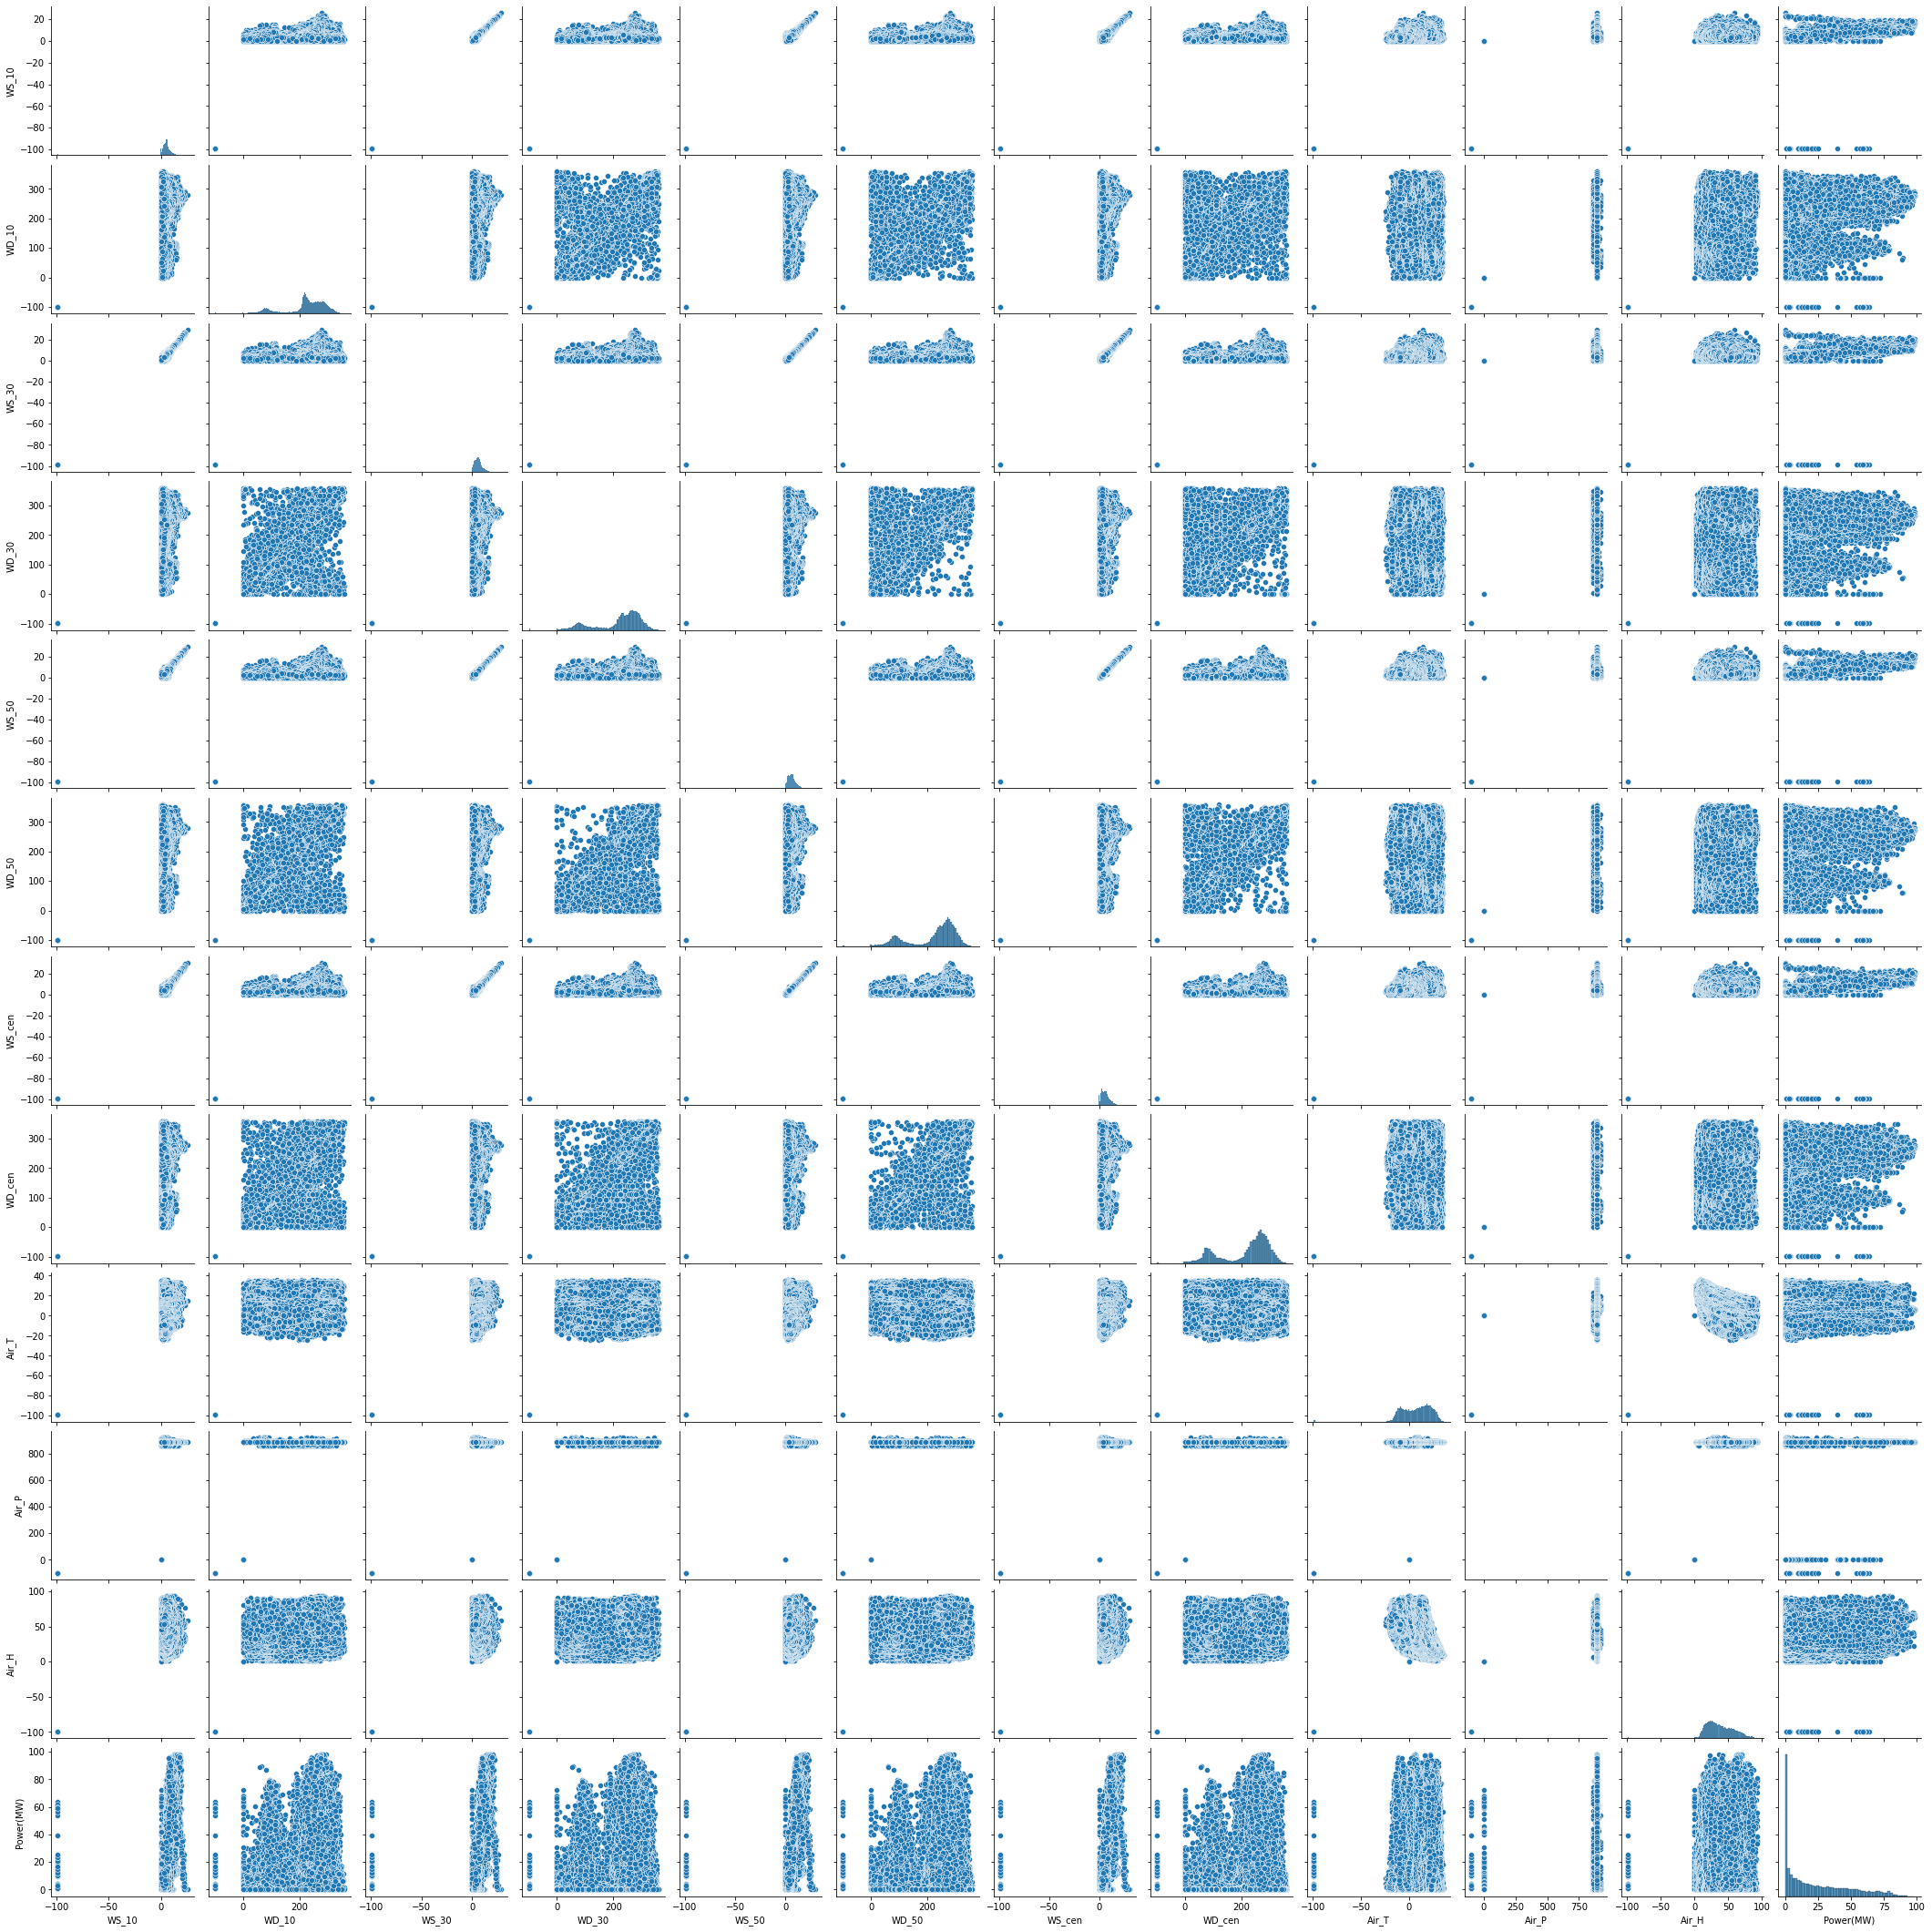

In [6]:
import seaborn as sns
sns.pairplot(Dataset_WF_site1, hue=None, size=2.5)

In [7]:
Dataset_WF_site1.corr().round(2)

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
WS_10,1.00,0.37,0.99,0.38,0.98,0.39,0.97,0.39,0.41,0.69,0.25,0.46
WD_10,0.37,1.00,0.38,0.92,0.38,0.88,0.39,0.85,0.26,0.22,0.12,0.33
WS_30,0.99,0.38,1.00,0.39,1.00,0.41,0.99,0.42,0.43,0.65,0.23,0.54
WD_30,0.38,0.92,0.39,1.00,0.39,0.94,0.39,0.90,0.27,0.20,0.09,0.36
WS_50,0.98,0.38,1.00,0.39,1.00,0.41,1.00,0.42,0.43,0.64,0.23,0.56
WD_50,0.39,0.88,0.41,0.94,0.41,1.00,0.41,0.95,0.28,0.19,0.08,0.38
WS_cen,0.97,0.39,0.99,0.39,1.00,0.41,1.00,0.42,0.44,0.64,0.22,0.57
WD_cen,0.39,0.85,0.42,0.90,0.42,0.95,0.42,1.00,0.30,0.18,0.06,0.39
Air_T,0.41,0.26,0.43,0.27,0.43,0.28,0.44,0.30,1.00,0.29,-0.47,0.21
Air_P,0.69,0.22,0.65,0.20,0.64,0.19,0.64,0.18,0.29,1.00,0.29,0.01


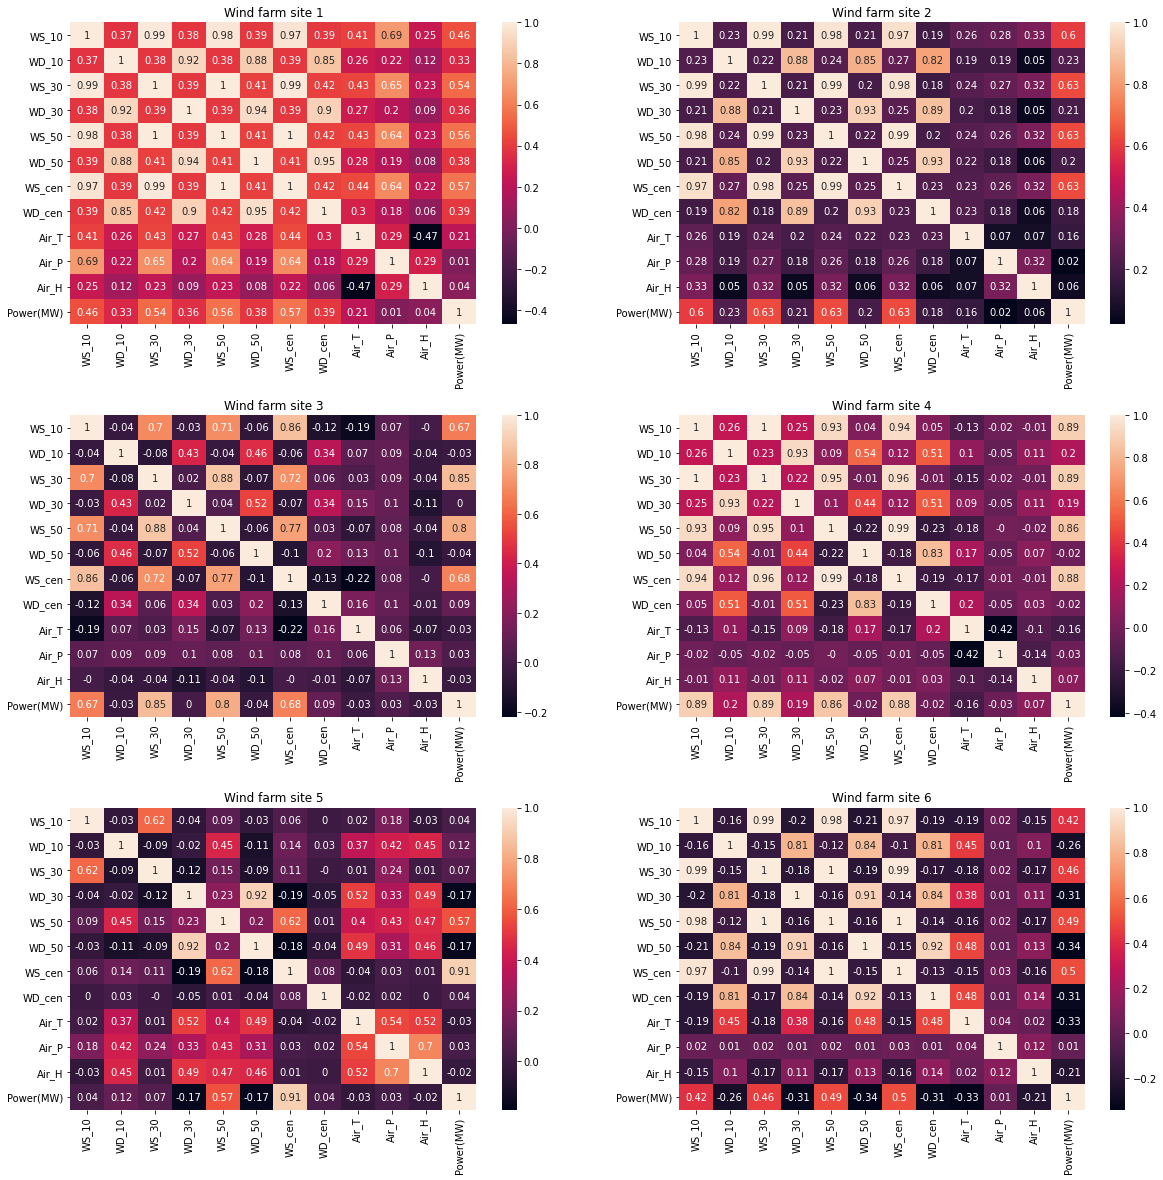

In [8]:
from matplotlib import pyplot as plt
import math
from pylab import *
fig, axes = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6],
                  range(6)):
    sns.heatmap(data.corr().round(2),annot=True, ax=axes[math.floor(i/2)][i%2]).set(title=f'Wind farm site {i+1}')
plt.savefig('./Figures/WF_correlation')

# the analysis of the solar stations

In [9]:
# upload the data from .xslx files
import pandas as pd
Dataset_SS_site1 = pd.read_excel(r'data_original/solar_stations/Solar station site 1 (Nominal capacity-50MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site2 = pd.read_excel(r'data_original/solar_stations/Solar station site 2 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site3 = pd.read_excel(r'data_original/solar_stations/Solar station site 3 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site4 = pd.read_excel(r'data_original/solar_stations/Solar station site 4 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site5 = pd.read_excel(r'data_original/solar_stations/Solar station site 5 (Nominal capacity-110MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site6 = pd.read_excel(r'data_original/solar_stations/Solar station site 6 (Nominal capacity-35MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site7 = pd.read_excel(r'data_original/solar_stations/Solar station site 7 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site8 = pd.read_excel(r'data_original/solar_stations/Solar station site 8 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)

C:\Users\Q\AppData\Local\Temp/ipykernel_27360/2656163588.py:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Dataset_SS_site4 = pd.read_excel(r'data_original/solar_stations/Solar station site 4 (Nominal capacity-130MW).xlsx'


In [10]:
Dataset_SS_site1.head()

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
1,2019-01-01 00:15:00,0,0,0,-11.8,930.5,39.3,0.0
2,2019-01-01 00:30:00,0,0,0,-11.4,930.5,39.0,0.0
3,2019-01-01 00:45:00,0,0,0,-11.5,930.5,38.0,0.0
4,2019-01-01 01:00:00,0,0,0,-11.5,930.4,38.9,0.0
5,2019-01-01 01:15:00,0,0,0,-11.8,930.1,39.6,0.0


In [11]:
for dataset in [Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                , Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]:
    dataset.columns=['time','TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']

In [12]:
Dataset_SS_site6.head()

,time,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
1,2019-01-01 00:15:00,0,0,0,11.6,837.25336,54.76,0.0
2,2019-01-01 00:30:00,0,0,0,11.36,837.2133,57.16,0.0
3,2019-01-01 00:45:00,0,0,0,11.313334,837.2,58.733334,0.0
4,2019-01-01 01:00:00,0,0,0,11.26,837.0933,59.933334,0.0
5,2019-01-01 01:15:00,0,0,0,10.933333,836.94666,62.113335,0.0


In [13]:
# outliers processing
Dataset_SS_site7.isnull().sum()

time         0
TSI          0
DNI          0
GHI          0
Air_T        0
Air_P        0
Air_H        0
Power(MW)    0
dtype: int64

In [14]:
Dataset_SS_site5.replace('--', 'NaN', inplace=True)
Dataset_SS_site6.replace('<NULL>', 'NaN', inplace=True)
Dataset_SS_site7.replace('<NULL>', 'NaN', inplace=True)
# Dataset_SS_site5.dropna(how='any', inplace=True)
# Dataset_SS_site6.dropna(how='any', inplace=True)
# Dataset_SS_site7.dropna(how='any', inplace=True)

In [15]:
for dataset in [Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7]:
    for tile in ['TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']:
        dataset[tile]= dataset[tile].astype('float')

In [16]:
Dataset_SS_site5.dropna(how='any', inplace=True)
Dataset_SS_site5.loc[10310:10315,:]

,time,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
10311,2019-04-18 09:45:00,761.0,650.0,629.0,28.0,1002.1,46.5,65.58
10312,2019-04-18 10:00:00,797.0,674.0,662.0,28.5,1002.4,43.6,69.85
10313,2019-04-18 10:15:00,763.0,658.0,627.0,29.5,1002.4,41.5,66.78
10314,2019-04-18 10:30:00,778.0,682.0,649.0,29.2,1002.4,40.9,71.11
10315,2019-04-18 10:45:00,913.0,746.0,757.0,29.5,1002.3,37.8,77.25


In [17]:
Dataset_SS_site6.loc[5320:5330,:]

,time,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
5320,2019-02-25 10:00:00,605.60000,799.20000,68.466670,17.806667,832.12000,26.840000,15.264000
5321,2019-02-25 10:15:00,659.53330,828.40000,77.733330,18.240000,832.01330,25.013334,17.448668
5322,2019-02-25 10:30:00,724.66670,860.60000,88.200000,18.486666,832.00000,23.886667,19.428667
5323,2019-02-25 10:45:00,760.46670,851.93335,92.933334,18.926666,831.74664,22.846666,20.671333
5324,2019-02-25 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.671333
5325,2019-02-25 11:15:00,NaN,NaN,NaN,NaN,NaN,NaN,20.671333
5326,2019-02-25 11:30:00,944.73334,862.66670,111.600000,19.860000,831.46000,21.246666,24.822666
5327,2019-02-25 11:45:00,965.26666,851.80000,114.933334,20.446667,831.56665,20.933332,25.630000
5328,2019-02-25 12:00:00,996.33330,853.86664,119.200000,20.853333,831.32000,20.680000,26.531334
5329,2019-02-25 12:15:00,1042.00000,861.86664,123.533330,21.046667,831.21330,20.486666,27.445333


In [18]:
Dataset_SS_site5.dtypes

time         datetime64[ns]
TSI                 float64
DNI                 float64
GHI                 float64
Air_T               float64
Air_P               float64
Air_H               float64
Power(MW)           float64
dtype: object

In [19]:
'--' in Dataset_SS_site5

False

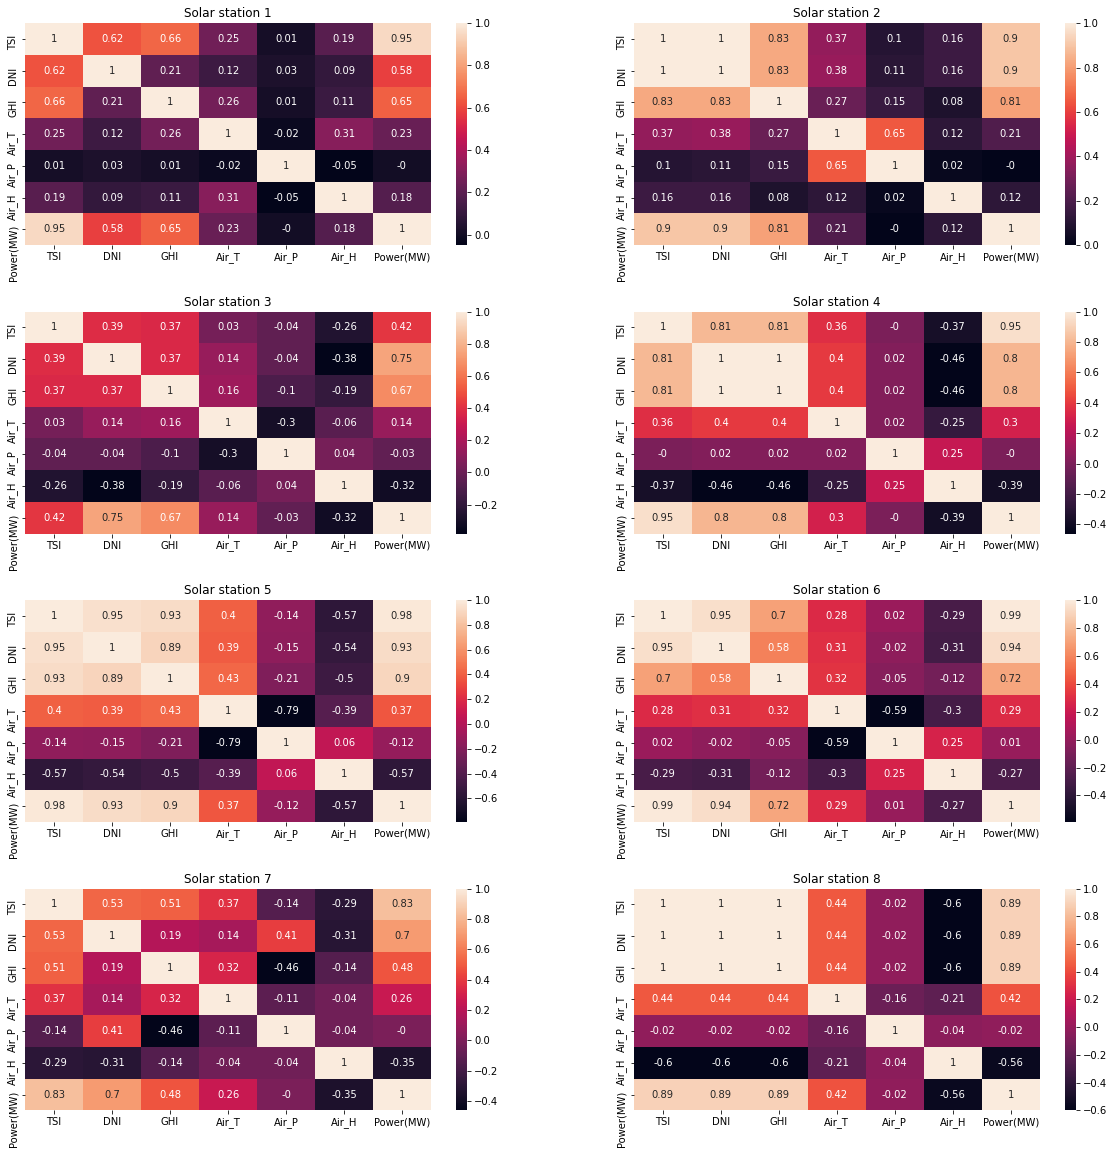

In [20]:
fig, axes = plt.subplots(4,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                   ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8],
                  range(8)):
    sns.heatmap(data.corr().round(2), annot=True, ax=axes[math.floor(i/2)][i%2]).set(title=f'Solar station {i+1}')
plt.savefig('./Figures/SS_correlation')

In [21]:
Dataset_SS_site5.dtypes

time         datetime64[ns]
TSI                 float64
DNI                 float64
GHI                 float64
Air_T               float64
Air_P               float64
Air_H               float64
Power(MW)           float64
dtype: object

In [22]:
Dataset_SS_site4.dtypes

time         datetime64[ns]
TSI                 float64
DNI                 float64
GHI                 float64
Air_T               float64
Air_P               float64
Air_H               float64
Power(MW)           float64
dtype: object

# plot the missing data situation of wind farm and solar station

In [23]:
Num_WF_site1_missing_sample = 76 # from 2020-05-12 01:15:00 to 2020-05-12 20:00:00
Num_WF_site1_outlier = 0

Num_WF_site2_missing_sample = 76
Num_WF_site2_outlier = 0

In [24]:
Dataset_WF_site2['WS_cen'].value_counts()

0.000    3300
8.765     502
9.530     472
9.224     462
8.612     452
         ... 
2.674       1
4.776       1
2.268       1
1.624       1
3.608       1
Name: WS_cen, Length: 3582, dtype: int64

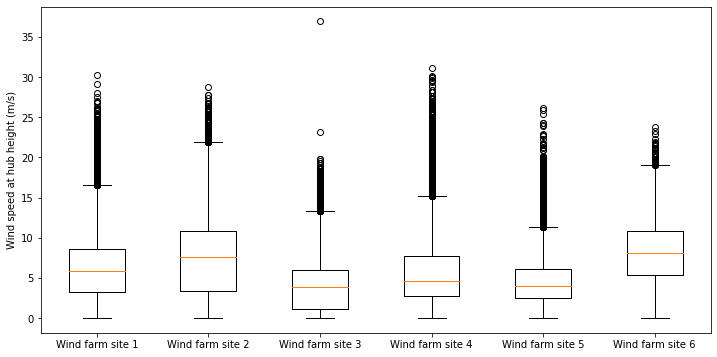

In [38]:
# drop value missing data
WS_name = ['Wind farm site 1', 'Wind farm site 2', 'Wind farm site 3', 'Wind farm site 4', 'Wind farm site 5', 'Wind farm site 6']
plt.figure(figsize=(12,6))
plt.boxplot([Dataset_WF_site1.drop(Dataset_WF_site1[Dataset_WF_site1['WS_cen'] == -99].index).WS_cen
             ,Dataset_WF_site2.drop(Dataset_WF_site2[Dataset_WF_site2['WS_cen'] == -99].index).WS_cen
             ,Dataset_WF_site3.WS_cen
             ,Dataset_WF_site4.WS_cen.dropna()
             ,Dataset_WF_site5.WS_cen.dropna()
             ,Dataset_WF_site6.drop(Dataset_WF_site6[Dataset_WF_site6['WS_cen'] == -99].index).WS_cen]
             ,labels=WS_name);
plt.ylabel('Wind speed at hub height (m/s)')
plt.savefig('./Figures/WF_boxplot')

c:\users\q\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\q\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WS_cen', ylabel='Density'>

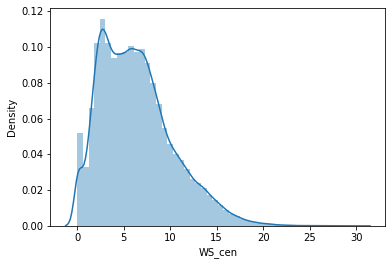

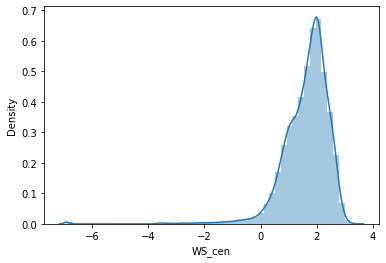

In [85]:
# skewness analysis of wind farms
sns.distplot(Dataset_WF_site1.drop(Dataset_WF_site1[Dataset_WF_site1['WS_cen'] == -99].index).WS_cen)
log_data = np.log(Dataset_WF_site1.drop(Dataset_WF_site1[(Dataset_WF_site1['WS_cen'] == -99)|(Dataset_WF_site1['WS_cen'] == 0.0)].index).WS_cen)
fig = plt.figure()
sns.distplot(log_data)

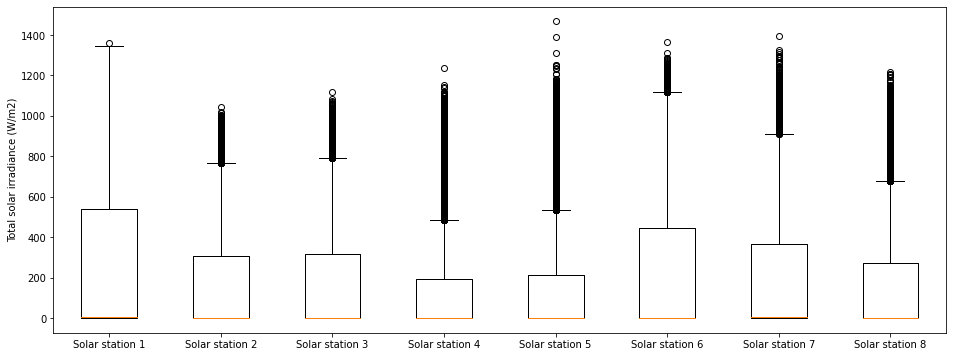

In [55]:
SS_name = ['Solar station 1', 'Solar station 2', 'Solar station 3', 'Solar station 4', 'Solar station 5', 'Solar station 6'
           , 'Solar station 7', 'Solar station 8']
plt.figure(figsize=(16,6))
plt.boxplot([Dataset_SS_site1.drop(Dataset_SS_site1[(Dataset_SS_site1['TSI'] == -99)|(Dataset_SS_site1['TSI'] == '<null>')].index).TSI
             ,Dataset_SS_site2.drop(Dataset_SS_site2[(Dataset_SS_site2['TSI'] == -99)|(Dataset_SS_site2['TSI'] == '<null>')].index).TSI
             ,Dataset_SS_site3.TSI[0:21000]
             ,Dataset_SS_site4.TSI
             ,Dataset_SS_site5.TSI
             ,Dataset_SS_site6.TSI.dropna()
             ,Dataset_SS_site7.drop(Dataset_SS_site7[(Dataset_SS_site7['TSI'] < 0)|(Dataset_SS_site7['TSI'] >3000)].index).TSI.dropna()
             ,Dataset_SS_site8.TSI], labels=SS_name);
plt.ylabel('Total solar irradiance (W/m2)')
plt.savefig('./Figures/SS_boxplot')

In [27]:
# plot the number of missing data and outliers
statistic = Dataset_WF_site2.describe()
statistic

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,6.227269,217.613551,7.058625,216.522537,7.297982,208.742419,7.455671,206.799319,8.614907,877.413412,33.266920,72.681263
std,4.929299,87.071233,5.329943,89.759781,5.467425,87.357356,5.657089,87.002253,13.509332,72.377016,7.989529,55.720435
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,3.028000,135.873000,3.436000,123.346000,3.516000,114.619500,3.359000,114.138000,-3.450000,880.570000,32.776000,14.006667
50%,6.470000,248.660000,7.288000,265.591000,7.525000,256.751000,7.631000,243.134000,10.274000,884.022000,32.908000,75.365135
75%,9.108000,296.019500,10.142000,295.088000,10.453000,285.056500,10.770000,283.763000,19.956500,887.528500,33.056000,124.271572
max,23.300000,359.916000,27.125000,360.000000,28.196000,359.889000,28.808000,359.802000,37.590000,900.450000,97.580000,201.248080


In [28]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    return [u,l]

def num_of_mo(data, column_name='WS_cen'):
    u,l = iqr_fence(data[column_name])
    num = data[data[column_name] > u].shape[0]
    rate = format(num/data.shape[0], '0.2%')
    return num

In [29]:
# missing data and outliers rate calculation for Wind farms
WF_missing_num = [0]*6
WF_outliers_num = [0]*6
WF_MO_rate = [0]*6
for i, data in zip(range(6),[Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]):
    WF_outliers_num[i] = num_of_mo(data)

WF_missing_num[0] =76
WF_missing_num[1] = Dataset_WF_site2[Dataset_WF_site2['WS_cen']==-99].shape[0]
WF_missing_num[2] = Dataset_WF_site3[Dataset_WF_site3['Air_P']==-0.00].shape[0]
WF_missing_num[3] = Dataset_WF_site4[Dataset_WF_site4['WS_cen'].isnull()].shape[0]
WF_missing_num[4] = Dataset_WF_site5[Dataset_WF_site5['Air_P'].isnull()].shape[0]
WF_missing_num[5] = Dataset_WF_site6[Dataset_WF_site6['WS_cen']==-99].shape[0]

WF_MO_num = np.sum([WF_missing_num, WF_outliers_num], axis=0)

for i, num, data in zip(range(6), WF_MO_num, [Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]):
    WF_MO_rate[i] = format(num/data.shape[0], '0.2%')

In [52]:
WF_MO_rate

['1.55%', '0.45%', '1.39%', '3.25%', '5.09%', '0.27%']

In [30]:
# missing data and outliers rate calculation for Solar station
SS_missing_num = [0]*8
SS_outliers_num = [0]*8
SS_MO_rate = [0]*8
for i, data in zip(range(8),[Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                             ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]):
    SS_outliers_num[i] = num_of_mo(data, column_name='TSI')

SS_missing_num[0] = Dataset_SS_site1[Dataset_SS_site1['TSI']==-99].shape[0]
SS_missing_num[1] = Dataset_SS_site2[Dataset_SS_site2['TSI']==-99].shape[0]
SS_missing_num[2] = 32256
SS_missing_num[3] = 0
SS_missing_num[4] = 46
SS_missing_num[5] = 458
SS_missing_num[6] = 459
SS_missing_num[7] = 0

SS_MO_num = np.sum([SS_missing_num, SS_outliers_num], axis=0)
for i, num, data in zip(range(8), SS_MO_num, [Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                             ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]):
    SS_MO_rate[i] = format(num/data.shape[0], '0.2%')

In [53]:
SS_MO_rate

['0.09%', '4.50%', '78.25%', '13.26%', '13.41%', '1.94%', '4.45%', '6.15%']

# seasonal classification

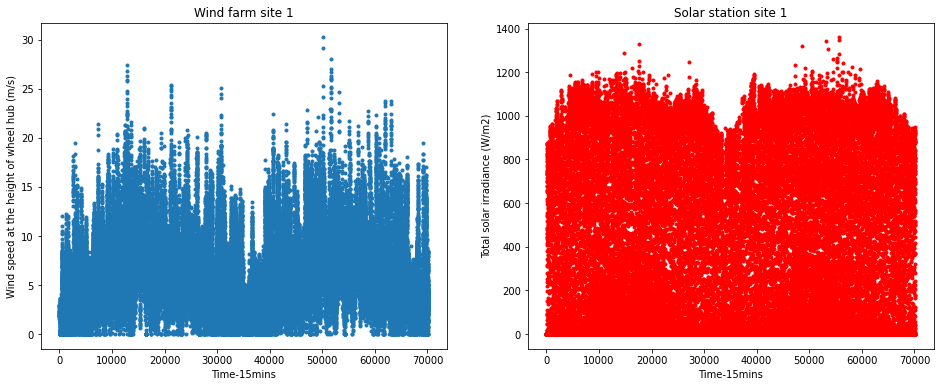

In [50]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(Dataset_WF_site1.drop(Dataset_WF_site1[Dataset_WF_site1['WS_cen']==-99].index).WS_cen,'.')
plt.xlabel('Time-15mins')
plt.ylabel('Wind speed at the height of wheel hub (m/s)')
plt.title('Wind farm site 1')
plt.subplot(1,2,2)
plt.plot(Dataset_SS_site1.drop(Dataset_SS_site1[Dataset_SS_site1['TSI']==-99].index).TSI, '.', c='r')
plt.xlabel('Time-15mins')
plt.ylabel('Total solar irradiance (W/m2)')
plt.title('Solar station site 1')
plt.savefig('./Figures/seasonal')